Monday, May 6, 2019

Hello World! 

Please find below an anlysis assignemnt I recently completed. I submitted answers in Python, via a Jupyter Notebook. To answer the SQL questions, I ran SQL through Python via Pandas and SQLite. 

Thanks for stopping by!

Best, 
<br>George

In [1]:
#importing what I need
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3 as sql

In [2]:
#connecting
conn = sql.connect("storeco_georgehayward_data-scientist-candidate.db")
#reading in takehome data assignment
storeco = pd.read_csv("storeco_data.csv")
#cleaning the data
storeco.columns = storeco.columns.str.strip()
#need to get the strings into dates
storeco['dateordered'] =  pd.to_datetime(storeco['dateordered'],format='%m/%d/%y')
storeco['datereturned'] =  pd.to_datetime(storeco['datereturned'],format='%m/%d/%y')
#prepaing for SQL
storeco.to_sql("storeco",conn,if_exists='replace',index=False)

### Exercise 1: Crunch the data and tell us whether our return rate is trending up or down. Additional insights are welcome, but not required.

George JJTA Hayward: First, I am going to get you a table that shows everything we need quickly. Second, I am going to give you a data visualization that summarizes the table. 

In [3]:
#I will inject the SQL into Python below:
pd.read_sql_query("""
SELECT 
strftime('%Y-%m', dateordered) AS 'Order Month',
sum(orders) AS 'Total Orders',
sum(CASE WHEN orderstatus = 'returned' THEN 0 ELSE orders END) AS 'Completed Orders',
sum(CASE WHEN orderstatus = 'complete' THEN 0 ELSE orders END) AS 'Returned Orders',
100*round(sum(CASE WHEN orderstatus = 'complete' THEN 0 ELSE orders END)/((sum(orders))*1.00),3) AS 'Return Percentage'
FROM storeco 
GROUP BY 1
ORDER BY 1 ASC;
""", conn)

,Order Month,Total Orders,Completed Orders,Returned Orders,Return Percentage
0,2016-08,149,139,10,6.7
1,2016-09,143,134,9,6.3
2,2016-10,180,170,10,5.6
3,2016-11,226,214,12,5.3
4,2016-12,395,376,19,4.8


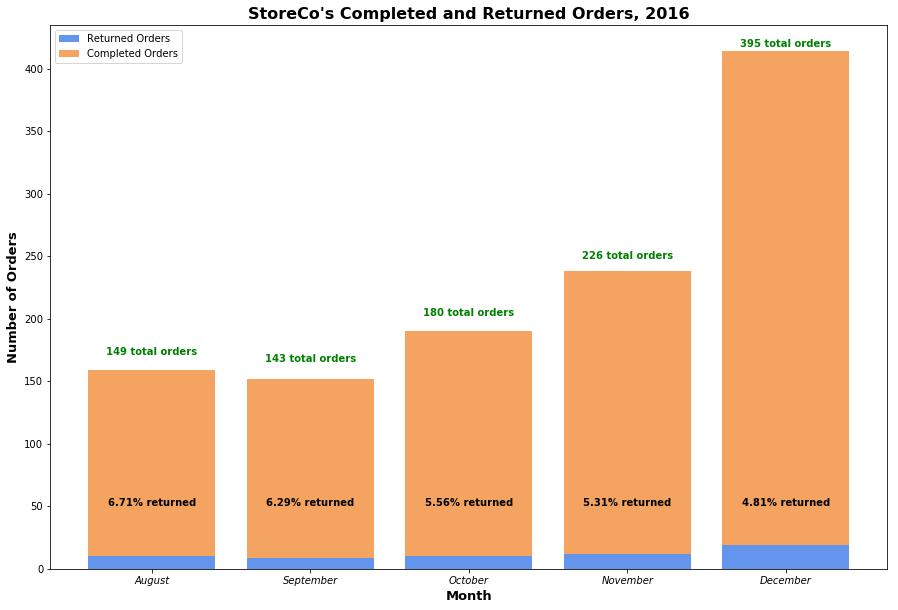

In [4]:
#I will now show viszualize the data. I prefer a stacked bar chart for this:
storeco_dv = pd.read_sql_query("""
SELECT 
strftime('%Y-%m', dateordered) AS 'Order_Month',
sum(orders) AS 'Total_Orders',
sum(CASE WHEN orderstatus = 'returned' THEN 0 ELSE orders END) AS 'Completed_Orders',
sum(CASE WHEN orderstatus = 'complete' THEN 0 ELSE orders END) AS 'Returned_Orders',
100*round(sum(CASE WHEN orderstatus = 'complete' THEN 0 ELSE orders END)/((sum(orders))*1.00),4) AS 'Return_Percentage'
FROM storeco 
GROUP BY 1
ORDER BY 1 ASC;
""", conn)

f, ax = plt.subplots(figsize=(15, 10))

returns = storeco_dv.Returned_Orders
total = storeco_dv.Total_Orders
percent = storeco_dv.Return_Percentage

p1 = plt.bar(range(len(returns)),
 returns, color = 'cornflowerblue')

p2 = plt.bar(range(len(total)),
 total, bottom = returns, color = 'sandybrown')

ax.set_xticklabels(['0','August', 'September', 'October','November', 'December'], style='italic')
plt.xlabel("Month", fontweight='bold', fontsize = 13)
plt.ylabel("Number of Orders", fontweight='bold', fontsize = 13)
plt.legend((p1[0], p2[0]), ('Returned Orders', 'Completed Orders'))
plt.title("StoreCo's Completed and Returned Orders, 2016", fontsize = 16, fontweight = 'bold')

for a,b in zip(range(len(total)), total):
   plt.text(a, b+22, str(b)+" total orders", horizontalalignment='center', color='green', fontweight='bold')

for a,b in zip(range(len(percent)), percent):
   plt.text(a, 0+50, str(round(b,2))+"% returned", horizontalalignment='center', color='black', fontweight='bold')

plt.savefig('hayward_george_storeco_data_scientist_candidate.png')
plt.show()

George JJTA Hayward:  Additional insight: The return rate is going down because completed orders are increasing. The absolute number of returns is staying steady. So we may want to look at why we can't get returns to be any lower (this could be a policy or disclosure change with the customer). Further, please note that in the data set, returns never go higher than one per day.

### Exercise 2: Write the SQL code to produce number of completed orders by date (name of source data table is ‘storeco_orders’).

George JJTA Hayward: In a way, this is already included in my original table, and I will also replicate that information below, via SQL, with a slightly different SELECT statement. Please also note that I have called the table 'storeco' instead of 'storeco_orders'. Finally, the below query will group by month, as opposed to day, because it says "we measure our metrics by month, so please provide the answer at a month" in the rules of the takehome assignment. 

In [5]:
pd.read_sql_query("""
SELECT 
strftime('%Y-%m', dateordered) AS 'Order_Month',
sum(orders) AS 'Total_Completed_Orders'
FROM storeco 
WHERE orderstatus = 'complete'
GROUP BY 1
ORDER BY 1 ASC;
""", conn)

,Order_Month,Total_Completed_Orders
0,2016-08,139
1,2016-09,134
2,2016-10,170
3,2016-11,214
4,2016-12,376


Thanks for reading through everything!
<br>Best,
<br>George JJTA Hayward
<br>Data Scientist Candidate
<br>May 6, 2019